## 🏦 **CreditBanK**

---



---


### **Libraries and dependencies**

In [ ]:
#warnings
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np # Permet d’effectuer des calculs numériques avec Python
import pandas as pd # Pour l'analyse de données. Il propose un certain nombre d'opérations d'exploration, de nettoyage et de transformation des données.
import matplotlib.pyplot as plt # Une bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques
from importlib import reload
import seaborn as sns
from pandas import read_csv # Pour lire un fichier excel
from google.colab import drive # Pour accéder à drive 
from IPython.display import Image

In [ ]:
#Feature selection
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#Encodage
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int, sparse=True)

In [ ]:
#Normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#PCA
from sklearn.decomposition import PCA

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Agglomerative Hierarchical Clustering (AHC)
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [ ]:
#Decision Tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [ ]:
# Chargement de GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score

In [ ]:
#Import Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation 
from sklearn import metrics

In [ ]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
#CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### **Load Dataset from Drive**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importer l'entrepôt de données
credits = pd.read_excel('/content/drive/MyDrive/Machine_learning/Projet/CreditBankCS.xlsx')
credits

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
0,29921.0,0,2493.416667,51,10,0,1,1,831.138889,2,Titular,Single,House Owner,Others,Accepted
1,22912.0,530,1379.333333,32,5,3,2,1,636.444444,1,Titular,Single,Living with parents,Developpement,Accepted
2,15780.0,0,1315.000000,30,5,3,0,2,438.333333,0,Titular,Single,Living with parents,Agriculture,Refused
3,31293.0,848,1759.750000,29,5,2,2,0,869.250000,1,Contractual,Single,Living with parents,Others,Accepted
4,14312.0,0,1192.666667,36,10,2,2,2,397.555556,1,Titular,Single,House Owner,Handwork,Tolerated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,25264.0,0,2105.333333,20,5,4,0,0,701.777778,2,Titular,Single,House Owner,Education,Tolerated
145,9251.0,0,770.916667,68,20,2,1,1,256.972222,1,Retired,Married,House Owner,Others,Refused
146,16901.0,0,1408.416667,50,2,3,0,3,469.472222,0,Contractual,Single,Float Owner,Manufacturing,Refused
147,28862.0,0,2405.166667,33,5,2,1,1,801.722222,0,Contractual,Single,Living with parents,Public Services,Accepted


In [ ]:
# Importer l'entrepôt de données Test
creditsT = pd.read_excel(r'/content/drive/MyDrive/Machine_learning/Projet/CreditBankCS.xlsx', sheet_name='DataTest')
creditsT

,annual revenue,autre revenue,Salaire,age,Time with employer,nb last crédit refused,nb last crédit accepted,Persons in charge,Revenu net moyen,nb cars,cat soci pro,social state(matrial),Residental Staut,secteur de travail,Decision
0,11181.0,0,931.750000,45,2,4,2,4,310.583333,1,Contractual,Married,House Owner,Public Services,Refused
1,27475.0,0,2289.583333,34,5,0,1,2,763.194444,0,Contractual,Single,House Owner,Public Services,Accepted
2,21947.0,0,1828.916667,27,10,0,2,4,609.638889,2,Titular,Single,House Owner,Education,Accepted
3,28378.0,687,1677.833333,38,5,0,2,1,788.277778,1,Contractual,Single,Living with parents,Others,Accepted
4,12007.0,0,1000.583333,24,2,0,2,1,333.527778,1,Titular,Married,House Owner,Manufacturing,Refused
5,28085.0,0,2340.416667,50,5,4,0,2,780.138889,1,Titular,Married,Float Owner,Public Services,Tolerated
6,21409.0,0,1784.083333,24,5,3,0,2,594.694444,0,Titular,Single,Living with parents,Telecommunication,Refused
7,22858.0,0,1904.833333,45,5,2,0,3,634.944444,1,Contractual,Single,Float Owner,Commerce,Tolerated
8,22509.0,0,1875.750000,32,5,2,1,0,625.250000,1,Titular,Married,Float Owner,Telecommunication,Accepted
9,26410.0,0,2200.833333,22,10,2,1,2,733.611111,1,Contractual,Single,Living with parents,Developpement,Accepted


### **Avoir des informations sur la base de données**

In [ ]:
credits.info() # Afficher le résumé de l'ensemble de données.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   revenuAnnuel            149 non-null    float64
 1   autreRevenu             149 non-null    int64  
 2   salaire                 149 non-null    float64
 3   age                     149 non-null    int64  
 4   anneeTravaillee         149 non-null    int64  
 5   nbDernierCreditRefuse   149 non-null    int64  
 6   nbDernierCreditQccepte  149 non-null    int64  
 7   PersonnesEnCharge       149 non-null    int64  
 8   RevenuNetMoyen          149 non-null    float64
 9   nbVoitures              149 non-null    int64  
 10  catgSocialePro          149 non-null    object 
 11  statutSocial            149 non-null    object 
 12  Residence               149 non-null    object 
 13  secteurTravail          149 non-null    object 
 14  Decision                149 non-null    ob

In [ ]:
credits.dtypes # Permet de voir les types de données des colonnes.

revenuAnnuel              float64
autreRevenu                 int64
salaire                   float64
age                         int64
anneeTravaillee             int64
nbDernierCreditRefuse       int64
nbDernierCreditQccepte      int64
PersonnesEnCharge           int64
RevenuNetMoyen            float64
nbVoitures                  int64
catgSocialePro             object
statutSocial               object
Residence                  object
secteurTravail             object
Decision                   object
dtype: object

In [ ]:
credits.describe() # Permet d'obtenir un résumé des valeurs numériques.

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,19472.194631,94.268456,1528.414430,41.973154,6.261745,2.120805,1.020134,1.852349,540.894295,1.073826
std,6900.738472,225.918415,519.454614,14.923203,5.320023,1.304425,0.817625,1.362509,191.687180,0.668742
min,8418.000000,0.000000,701.500000,20.000000,1.000000,0.000000,0.000000,0.000000,233.833333,0.000000
25%,14199.000000,0.000000,1127.583333,29.000000,2.000000,1.000000,0.000000,1.000000,394.416667,1.000000
50%,18416.000000,0.000000,1479.333333,39.000000,5.000000,2.000000,1.000000,2.000000,511.555556,1.000000
75%,25634.000000,0.000000,1974.666667,53.000000,10.000000,3.000000,2.000000,3.000000,712.055556,1.000000
max,37536.000000,871.000000,2493.416667,77.000000,20.000000,4.000000,2.000000,4.000000,1042.666667,3.000000


In [ ]:
credits.describe().T # Transposé

,count,mean,std,min,25%,50%,75%,max
revenuAnnuel,149.0,19472.194631,6900.738472,8418.000000,14199.000000,18416.000000,25634.000000,37536.000000
autreRevenu,149.0,94.268456,225.918415,0.000000,0.000000,0.000000,0.000000,871.000000
salaire,149.0,1528.414430,519.454614,701.500000,1127.583333,1479.333333,1974.666667,2493.416667
age,149.0,41.973154,14.923203,20.000000,29.000000,39.000000,53.000000,77.000000
anneeTravaillee,149.0,6.261745,5.320023,1.000000,2.000000,5.000000,10.000000,20.000000
nbDernierCreditRefuse,149.0,2.120805,1.304425,0.000000,1.000000,2.000000,3.000000,4.000000
nbDernierCreditQccepte,149.0,1.020134,0.817625,0.000000,0.000000,1.000000,2.000000,2.000000
PersonnesEnCharge,149.0,1.852349,1.362509,0.000000,1.000000,2.000000,3.000000,4.000000
RevenuNetMoyen,149.0,540.894295,191.687180,233.833333,394.416667,511.555556,712.055556,1042.666667
nbVoitures,149.0,1.073826,0.668742,0.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
credits.head() # Afficher les 5 premieres  lignes de l'entrepôt de données

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
0,29921.0,0,2493.416667,51,10,0,1,1,831.138889,2,Titular,Single,House Owner,Others,Accepted
1,22912.0,530,1379.333333,32,5,3,2,1,636.444444,1,Titular,Single,Living with parents,Developpement,Accepted
2,15780.0,0,1315.000000,30,5,3,0,2,438.333333,0,Titular,Single,Living with parents,Agriculture,Refused
3,31293.0,848,1759.750000,29,5,2,2,0,869.250000,1,Contractual,Single,Living with parents,Others,Accepted
4,14312.0,0,1192.666667,36,10,2,2,2,397.555556,1,Titular,Single,House Owner,Handwork,Tolerated


In [ ]:
credits.tail() # Afficher les 5 dernieres  lignes de l'entrepôt de données

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
144,25264.0,0,2105.333333,20,5,4,0,0,701.777778,2,Titular,Single,House Owner,Education,Tolerated
145,9251.0,0,770.916667,68,20,2,1,1,256.972222,1,Retired,Married,House Owner,Others,Refused
146,16901.0,0,1408.416667,50,2,3,0,3,469.472222,0,Contractual,Single,Float Owner,Manufacturing,Refused
147,28862.0,0,2405.166667,33,5,2,1,1,801.722222,0,Contractual,Single,Living with parents,Public Services,Accepted
148,13560.0,0,1130.000000,23,10,3,1,2,376.666667,1,Titular,Married,Float Owner,Telecommunication,Tolerated


In [ ]:
credits.shape #Explorer les dimensions de l'entrepôt de données.

(149, 15)

In [ ]:
credits.columns # Afficher les noms des variables (“feature+LABEL”) 

Index(['revenuAnnuel', 'autreRevenu', 'salaire', 'age', 'anneeTravaillee',
       'nbDernierCreditRefuse', 'nbDernierCreditQccepte', 'PersonnesEnCharge',
       'RevenuNetMoyen', 'nbVoitures', 'catgSocialePro', 'statutSocial',
       'Residence', 'secteurTravail', 'Decision'],
      dtype='object')

In [ ]:
print(credits['Decision'].unique()) # Sélectionnez les valeurs possibles de la colonne Decision.

['Accepted' 'Refused' 'Tolerated']


In [ ]:
print(credits.groupby('Decision').size())

Decision
Accepted     44
Refused      75
Tolerated    30
dtype: int64


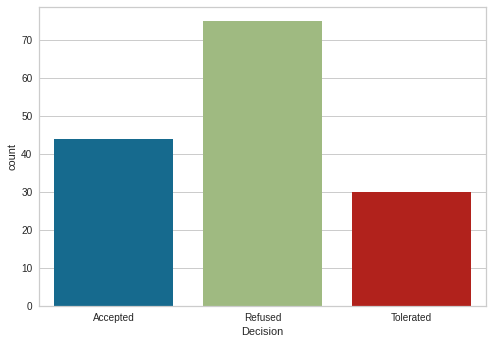

In [ ]:
sns.countplot(x=credits['Decision'])
plt.show()

### **La méthodologie CRISP-DM**

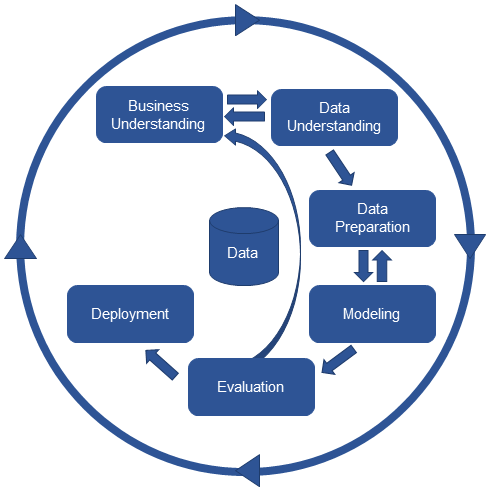

In [ ]:
Image(filename='/content/drive/MyDrive/Machine_learning/Projet/CRISP-DM-Model-Taylor-2017.png')

**1- La compréhension du problème métier**

---




Notre objectif est de pouvoir prendre la décison pour accepté une demande d'un crédit ou de la réfusé.

A partir des caractéristique fournit le systéme doit évaluer le risque pour pouvoir prendre la meilleur décision.

->  Améliorer l'expéricence de prise de décision


**2- La compréhension des données**

---





*   revenuAnnuel : le revenu annuel du demandant, son salaire declaré * 12 + autre revenu si existe * 12.
*   autreRevenu : Un revenu autre que le salaire.
*   salaire : le salaire du demandeur.
*   age : L'age du demandeur.
*   annéeTravaillee : Les années d'xpérience du demandeur.
*   nbDernierCreditRefuse : nombre des dérniers crédits réfusé s'il a demandé d'avant.
*   nbDernierCreditQccepte : nombre des dérniers accepté réfusé s'il a demandé d'avant.
*   PersonnesEnCharge : Si le demandeur a des personnes sous sa responsabilité.
*   RevenuNetMoyen : Revenue net à partir de sons salaire brut.
*   nbVoitures : nombre des voitures du demandeur.
*   catgSocialePro : Le type du contrat professionnel du demandeur.
*   statutSocial : Le demandeur est marié ou celibataire.
*   Residence : Le lieu où le demandeur habite.
*   secteurTravail : le domaine d'activité du demandeur.

**3- La préparation des données**

---




Les données brutes doivent être prétraitées avant d'être utilisées pour ajuster et évaluer un modèle d'apprentissage automatique.

**3.1- Netoyage des données**

**3.1.1- Identifier les valeurs aburentes :**

Pour détecter ces valeurs est de réaliser un box-plot pour chacune des variables. Les bornes du graphique délimitent les valeurs selon la distribution de la variable. Au-delà de ces extrémités, ces valeurs sont considérées comme des valeurs aberrantes.

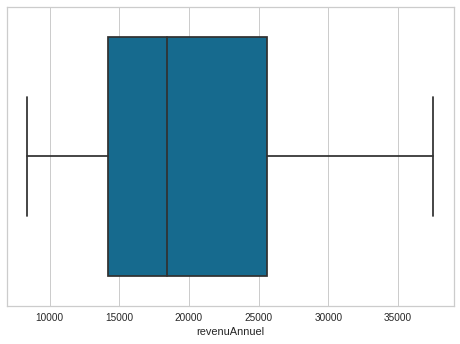

In [ ]:
sns.boxplot(credits['revenuAnnuel'])

-> Pas de valeur aburentes.

**3.1.2- Supprimer les colonnes qui ont les meme valeurs :**

-> Pas de colonnes redondates

**3.1.3- Supprimer les lignes en double :**

In [ ]:
credits.loc[credits['revenuAnnuel'].duplicated(keep=False),:]

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision


In [ ]:
credits.duplicated().sum() 

0

In [ ]:
credits.drop_duplicates()

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
0,29921.0,0,2493.416667,51,10,0,1,1,831.138889,2,Titular,Single,House Owner,Others,Accepted
1,22912.0,530,1379.333333,32,5,3,2,1,636.444444,1,Titular,Single,Living with parents,Developpement,Accepted
2,15780.0,0,1315.000000,30,5,3,0,2,438.333333,0,Titular,Single,Living with parents,Agriculture,Refused
3,31293.0,848,1759.750000,29,5,2,2,0,869.250000,1,Contractual,Single,Living with parents,Others,Accepted
4,14312.0,0,1192.666667,36,10,2,2,2,397.555556,1,Titular,Single,House Owner,Handwork,Tolerated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,25264.0,0,2105.333333,20,5,4,0,0,701.777778,2,Titular,Single,House Owner,Education,Tolerated
145,9251.0,0,770.916667,68,20,2,1,1,256.972222,1,Retired,Married,House Owner,Others,Refused
146,16901.0,0,1408.416667,50,2,3,0,3,469.472222,0,Contractual,Single,Float Owner,Manufacturing,Refused
147,28862.0,0,2405.166667,33,5,2,1,1,801.722222,0,Contractual,Single,Living with parents,Public Services,Accepted


-> Pas des lignes en double.

**3.1.4- Marquer les valeurs vides comme manquantes :**

In [ ]:
credits.isnull().values.any() # Identification des valeurs null

False

In [ ]:
credits.isnull().sum() # Nombre total de valeurs manquantes pour chaque caractéristique

revenuAnnuel              0
autreRevenu               0
salaire                   0
age                       0
anneeTravaillee           0
nbDernierCreditRefuse     0
nbDernierCreditQccepte    0
PersonnesEnCharge         0
RevenuNetMoyen            0
nbVoitures                0
catgSocialePro            0
statutSocial              0
Residence                 0
secteurTravail            0
Decision                  0
dtype: int64

In [ ]:
credits.isnull().sum().sum() # Nombre total de valeurs manquantes

0

In [ ]:
credits.notnull().values.any() # Identification des valeurs not null

True

In [ ]:
credits.notna().sum().sum() # 149 individus * 15 colonnes

2235

In [ ]:
credits = credits.replace('', np.nan)

-> Pas des colonnes vides.

Si il y a des valeurs null, une imputation des données sera necessaire:
* Mean  **credits.fillna(credits.mean())**
* Median **credits.fillna(credits.median())**
* Most Frequent Value **credits.fillna(credits.mode())**
* Constant **credits.fillna(constatnt)**

**3.2- Transformation de données**

**3.2.1- Encodage**

Caractéristique Nominale : chaque caractéristique catégorique avec n catégories est transformée en n caractéristiques binaires.

In [ ]:
#Training Data
credits['catgSocialePro'] = credits['catgSocialePro'].map({'Retired': 1, 'Titular': 2, 'Contractual': 3})
credits['statutSocial'] = credits['statutSocial'].map({'Single': 1, 'Married': 2})
credits['Residence'] = credits['Residence'].map({'Living with parents': 1, 'House Owner': 2,'Float Owner': 3})
credits['secteurTravail'] = credits['secteurTravail'].map({'Others': 1, 'Developpement': 2,'Agriculture': 3,'Handwork': 4,'Telecommunication': 5 ,'Education': 6 ,'Public Services': 7,'Manufacturing': 8,'Commerce': 9})
credits['Decision'] = credits['Decision'].map({'Refused': 1, 'Accepted': 2,'Tolerated':3})

In [ ]:
#Test Data
creditsT['cat soci pro'] = creditsT['cat soci pro'].map({'Retired': 1, 'Titular': 2, 'Contractual': 3})
creditsT['social state(matrial)'] = creditsT['social state(matrial)'].map({'Single': 1, 'Married': 2})
creditsT['Residental Staut'] = creditsT['Residental Staut'].map({'Living with parents': 1, 'House Owner': 2,'Float Owner': 3})
creditsT['secteur de travail'] = creditsT['secteur de travail'].map({'Others': 1, 'Developpement': 2,'Agriculture': 3,'Handwork': 4,'Telecommunication': 5 ,'Education': 6 ,'Public Services': 7,'Manufacturing': 8,'Commerce': 9})
creditsT['Decision'] = creditsT['Decision'].map({'Refused': 1, 'Accepted': 2,'Tolerated':3})

In [ ]:
#Rename Columns
creditsT.rename(columns={'annual revenue':'revenuAnnuel'}, inplace=True)
creditsT.rename(columns={'Salaire':'salaire'}, inplace=True)
creditsT.rename(columns={'age':'age'}, inplace=True)
creditsT.rename(columns={'Time with employer':'anneeTravaillee'}, inplace=True)
creditsT.rename(columns={'nb last crédit refused':'nbDernierCreditRefuse'}, inplace=True)
creditsT.rename(columns={'nb last crédit accepted':'nbDernierCreditQccepte'}, inplace=True)
creditsT.rename(columns={'Persons in charge':'PersonnesEnCharge'}, inplace=True)
creditsT.rename(columns={'Revenu net moyen':'RevenuNetMoyen'}, inplace=True)
creditsT.rename(columns={'secteur de travail':'secteurTravail'}, inplace=True)
creditsT.rename(columns={'Decision':'Decision'}, inplace=True)

**3.3- Feature Selection**

**3.3.1- Removing features with low variance :**

Il supprime toutes les caractéristiques dont la variance n'atteint pas un certain seuil. Par défaut, il supprime toutes les caractéristiques à variance nulle, c'est-à-dire les caractéristiques qui ont la même valeur dans tous les échantillons.

In [ ]:
#149 nombre totale des lignes
(credits['autreRevenu'] == 0).sum() *100 / 149
#Resultat 83% -> delete
del credits["autreRevenu"] 
del creditsT["autre revenue"] 

In [ ]:
#VarianceThreshold
x=credits.drop(['Decision'],axis=1)
s = VarianceThreshold(threshold=(0.6))
s.fit(x)
print("séléction des variables : ", s.get_support())
print("variables selectionnées : ", list(x.columns[s.get_support()]))
print("variables supprimées : ", list(x.columns[~s.get_support()]))

séléction des variables :  [ True  True  True  True  True  True  True  True False False False False
  True]
variables selectionnées :  ['revenuAnnuel', 'salaire', 'age', 'anneeTravaillee', 'nbDernierCreditRefuse', 'nbDernierCreditQccepte', 'PersonnesEnCharge', 'RevenuNetMoyen', 'secteurTravail']
variables supprimées :  ['nbVoitures', 'catgSocialePro', 'statutSocial', 'Residence']


**3.4- Feature engineering**

Ce n'est pas notre cas.

Si les données fournit peuvent ne pas etre suffisante pour concevoir un bon modèle.
* Creation des feautures (Sum, min, max).
* Extraction des features  partir d'un texte.
* Extraction des feutures à partir d'une image.

**3.5- Réduction de dimensionnalité**

**Méthode ACP**

In [ ]:
x = credits.drop(['Decision'],axis=1)
y = credits.loc[:,['Decision']].values

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal 1','principal 2' ])

target_names = {
    1:'Refused',
    2:'Accepted', 
    3:'Tolerated'
}
 
principalDf['Decision'] = y
principalDf['Decision'] = principalDf['Decision'].map(target_names)
 
principalDf


,principal 1,principal 2,Decision
0,10494.531945,-240.438162,Accepted
1,3422.605502,386.556441,Accepted
2,-3699.535969,-42.269346,Refused
3,11813.084356,586.423505,Accepted
4,-5173.045645,-21.754529,Tolerated
...,...,...,...
144,5820.057518,-175.055349,Tolerated
145,-10253.041774,48.949699,Refused
146,-2574.330611,-58.052466,Refused
147,9431.559304,-225.505954,Accepted


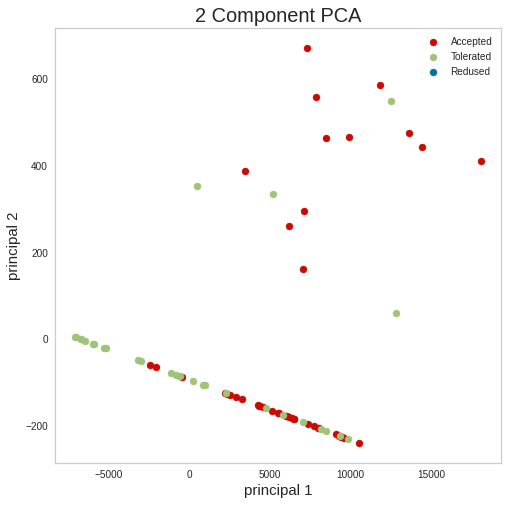

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal 1', fontsize = 15)
ax.set_ylabel('principal 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Accepted', 'Tolerated', 'Redused']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  indicesTokeep = principalDf['Decision'] == target
  ax.scatter(principalDf.loc[indicesTokeep, 'principal 1']
            , principalDf.loc[indicesTokeep, 'principal 2']
            , c = color
            , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([9.99131253e-01, 8.63306149e-04])

<function matplotlib.pyplot.show(*args, **kw)>

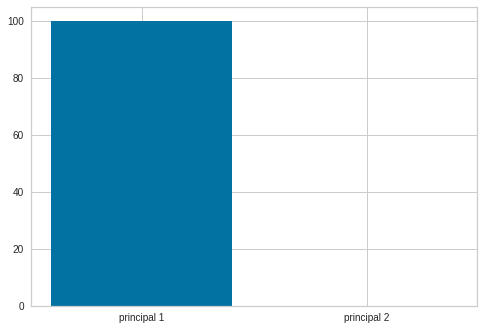

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_*100)
columns = ['principal 1','principal 2']
plt.bar(x=range(1,3),height=percent_variance, tick_label=columns)
#The x coordinates of the bars.

plt.ylabel=('Percentage of explained variances')
plt.ylabel=('Principal Components')
plt.title=('PCA Scree Plot')
plt.show

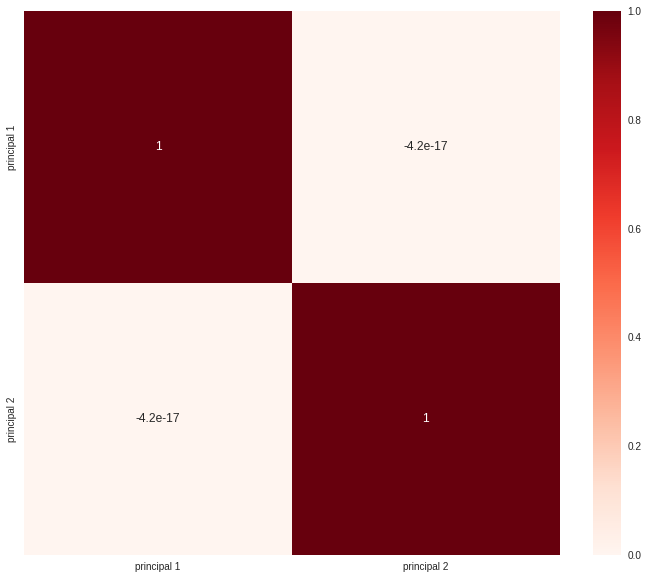

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = principalDf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**4- La mosélisation** / **5- L'évaluation**

---




**Apprentissage Supervicé (Predectif)**

***Classification***

In [ ]:
X_train= credits.drop(['Decision'],axis=1)
Y_train= credits['Decision']

X_test= creditsT.drop(['Decision'],axis=1)
Y_test= creditsT['Decision']

In [ ]:
#Normalisation -> Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

```
# kNN (k-Nearest Neighbors)
```

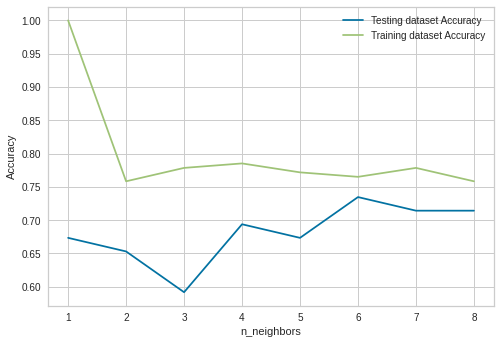

In [ ]:
# A plot to see the k-value for which we have high accuracy.
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
plt=reload(plt) 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Erreur')

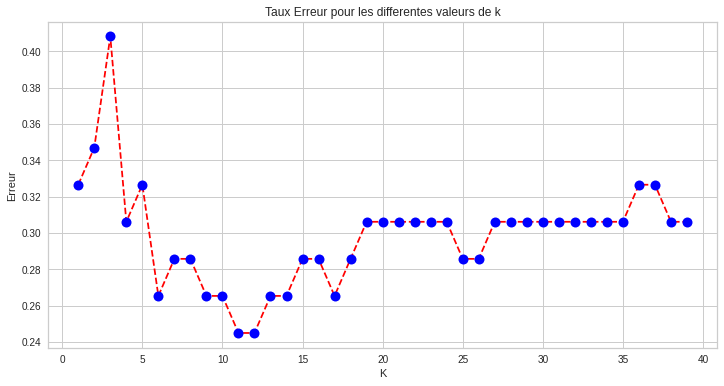

In [ ]:
# Choisir le nombre de voisins optimal
error = []
plt=reload(plt)
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [ ]:
#Le meilleur nombre de voisins k=11 ou K=12
knn = KNeighborsClassifier(11)
knn_model = knn.fit(X_train, Y_train)
y_pred_knn =knn_model.predict(X_test)

In [ ]:
#########################
#Evaluation
#########################

In [ ]:
# Matrice de confusion 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

print(confusion_matrix(Y_test, y_pred_knn))
print(classification_report(Y_test, y_pred_knn))

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.76
[[15  0  0]
 [ 0 19  0]
 [10  2  3]]
              precision    recall  f1-score   support

           1       0.60      1.00      0.75        15
           2       0.90      1.00      0.95        19
           3       1.00      0.20      0.33        15

    accuracy                           0.76        49
   macro avg       0.83      0.73      0.68        49
weighted avg       0.84      0.76      0.70        49



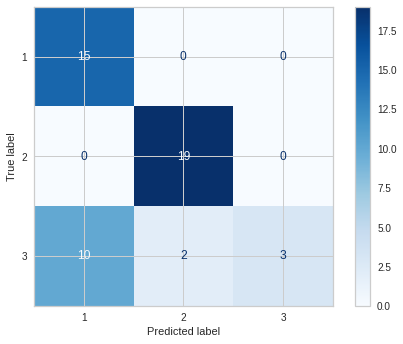

In [ ]:
plot_confusion_matrix(knn_model, X_test, Y_test,display_labels=['1','2','3'],cmap=plt.cm.Blues)  
plt.show()

```
# SVM (Support Vector Machine)
```

In [ ]:
svm = SVC()

# svm = SVC(kernel="linear") -> Kernel linéaire
# svm = SVC(kernel="poly") -> Noyeau polynomial
# svm = SVC(kernel="sigmoid") -> Noyeau Sigmoide
# svm = SVC(kernel="rbf") -> Noyeau Gaussien RBF

svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
#########################
#Evaluation
#########################

In [ ]:
# Matrice de confusion 
accuracy = accuracy_score(Y_test, y_pred_svm)
print('Accuracy of SVM: {:.2f}' .format(accuracy))

print(confusion_matrix(Y_test, y_pred_svm))
print(classification_report(y_pred_svm, Y_test))

Accuracy of SVM: 0.71
[[15  0  0]
 [ 0 19  0]
 [11  3  1]]
              precision    recall  f1-score   support

           1       1.00      0.58      0.73        26
           2       1.00      0.86      0.93        22
           3       0.07      1.00      0.12         1

    accuracy                           0.71        49
   macro avg       0.69      0.81      0.59        49
weighted avg       0.98      0.71      0.81        49



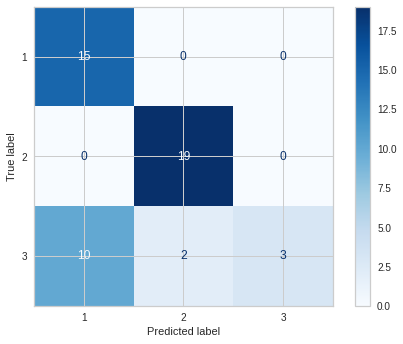

In [ ]:
plot_confusion_matrix(knn_model, X_test, Y_test,display_labels=['1','2','3'],cmap=plt.cm.Blues)  
plt.show()

In [ ]:
#########################
#Evaluation KNN VS SVM
#########################

Courbe ROC (ROC curves can only be applied to binary classification problems)

L’idée de la courbe ROC est de faire varier le « seuil » de 1 à 0 et, pour chaque cas, calculer le TVP et le TFP que l’on reporte dans un graphique : en abscisse le FPR, en ordonnée le TPR

TPR = Rappel = Sensibilité = TP/TP+FN

FPR = Spécificité = TN/TN+FP

-> Ce n'est appliquable dans notre cas

```
# Decision Tree
```

In [ ]:
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,19),'splitter': ['best','random']}
#Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision.
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
# entrainer le modele
grid.fit(X_train,Y_train)
grid.best_params_
final_model_dt = DecisionTreeClassifier(splitter='best',max_depth=3,criterion='gini')
final_model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

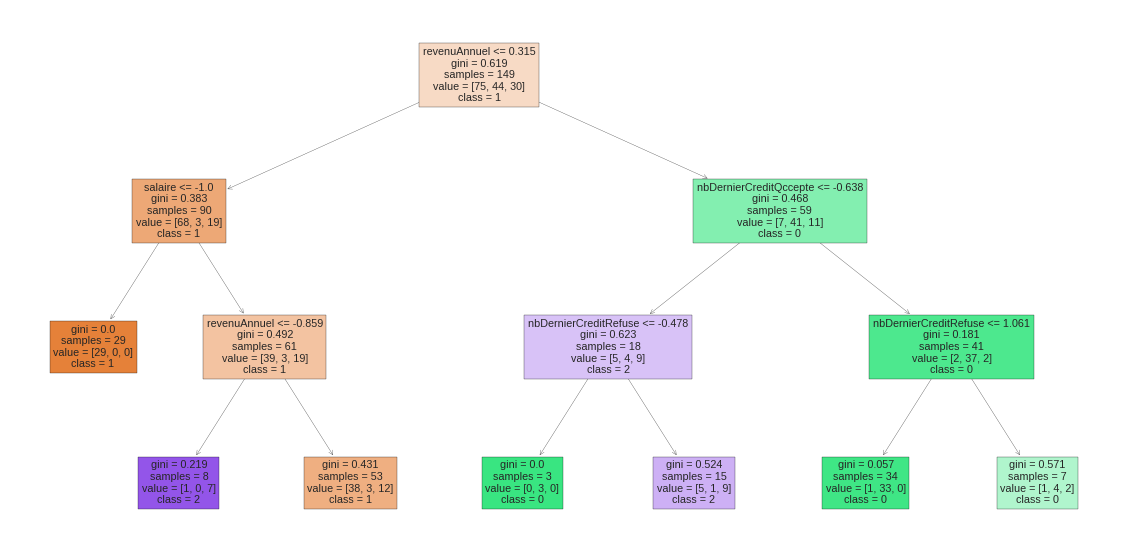

In [ ]:
features = credits.columns
plt.figure(figsize=(20, 10))
plot_tree(final_model_dt, feature_names=features,class_names= ['1','0','2'], filled=True)
plt.show()

In [ ]:
#########################
#Evaluation
#########################

In [ ]:
pred_tree_decision=final_model_dt.predict(X_test)
accuracy = accuracy_score(Y_test, pred_tree_decision)
print('Accuracy of SVM: {:.2f}' .format(accuracy))

print(classification_report(Y_test,pred_tree_decision,digits=8))

Accuracy of SVM: 0.76
              precision    recall  f1-score   support

           1  0.66666667 0.80000000 0.72727273        15
           2  0.86363636 1.00000000 0.92682927        19
           3  0.66666667 0.40000000 0.50000000        15

    accuracy                      0.75510204        49
   macro avg  0.73232323 0.73333333 0.71803400        49
weighted avg  0.74304267 0.75510204 0.73507851        49



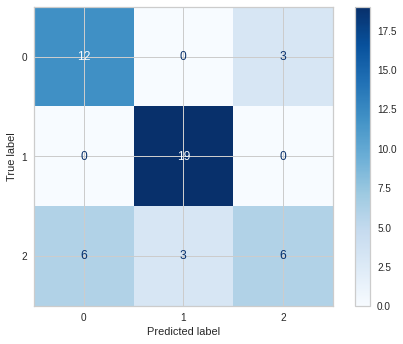

In [ ]:
plot_confusion_matrix(final_model_dt, X_test, Y_test,display_labels=['0','1','2'],cmap=plt.cm.Blues)  
plt.show()

```
# Random Forest
```

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred_r=clf.predict(X_test)

In [ ]:
#########################
#Evaluation
#########################

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_r))

Accuracy: 0.7346938775510204


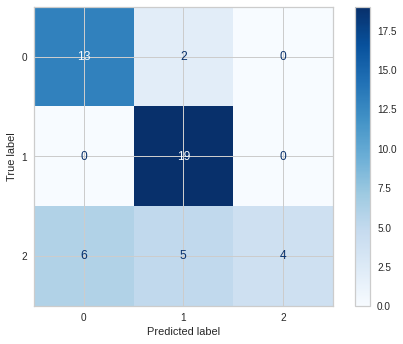

In [ ]:
plot_confusion_matrix(clf, X_test, Y_test,display_labels=['0','1','2'],cmap=plt.cm.Blues)  
plt.show()

```
# GaussianNB (Gaussian Naive Bayes)
```

In [ ]:
modelGaus=GaussianNB()
modelGaus.fit(X_train,Y_train)

#Les prédictions
y_pred_gauss = modelGaus.predict(X_test)

In [ ]:
#########################
#Evaluation
#########################

In [ ]:
print ("Accuracy: ", accuracy_score(Y_test, y_pred_gauss))
# matrice de confusion
print(confusion_matrix(Y_test,y_pred_gauss))
print(classification_report(Y_test,y_pred_gauss,digits=8))

Accuracy:  0.673469387755102
[[11  1  3]
 [ 0 19  0]
 [ 4  8  3]]
              precision    recall  f1-score   support

           1  0.73333333 0.73333333 0.73333333        15
           2  0.67857143 1.00000000 0.80851064        19
           3  0.50000000 0.20000000 0.28571429        15

    accuracy                      0.67346939        49
   macro avg  0.63730159 0.64444444 0.60918609        49
weighted avg  0.64067055 0.67346939 0.62545748        49



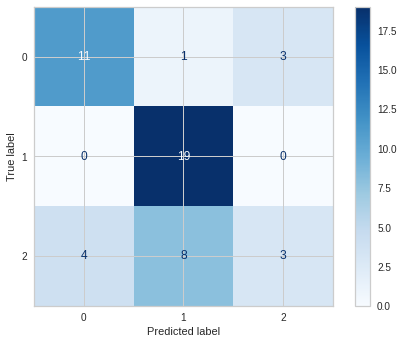

In [ ]:
plot_confusion_matrix(modelGaus, X_test, Y_test,display_labels=['0','1','2'],cmap=plt.cm.Blues)  
plt.show()

```
# XGBoost
```

In [ ]:
#Créer une instance instancier  XGBC de la classe LogisticRegression en fixant à zéro random_state
XGBC=XGBClassifier(random_state=43)
# entrainer ligreg
XGBC.fit(X_train,Y_train)

XGBClassifier(objective='multi:softprob', random_state=43)

In [ ]:
#Predict
y_pred_boost=XGBC.predict(X_test)

In [ ]:
#########################
#Evaluation
#########################

In [ ]:
print("Accuracy: ", accuracy_score(Y_test, y_pred_boost))
print(classification_report(Y_test,y_pred_boost,digits=8))

Accuracy:  0.7755102040816326
              precision    recall  f1-score   support

           1  0.66666667 0.93333333 0.77777778        15
           2  0.86363636 1.00000000 0.92682927        19
           3  0.83333333 0.33333333 0.47619048        15

    accuracy                      0.77551020        49
   macro avg  0.78787879 0.75555556 0.72693251        49
weighted avg  0.79406308 0.77551020 0.74325061        49



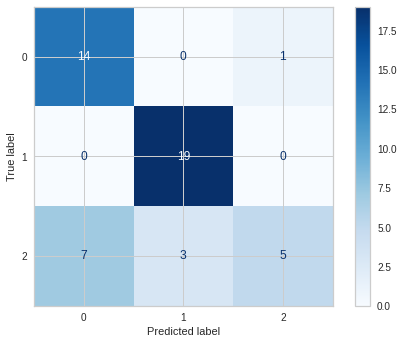

In [ ]:
plot_confusion_matrix(XGBC, X_test, Y_test,display_labels=['0','1','2'],cmap=plt.cm.Blues)  
plt.show()

***Regression***

```
# XGBOOST for Regression
```

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=20, random_state=43)
regressor.fit(X_train, Y_train)

[18:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=20, random_state=43)

In [ ]:
#Predict
y_pred_regressor = regressor.predict(X_test)

In [ ]:
#########################
#Evaluation
#########################

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_regressor))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_regressor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_regressor)))

Mean Absolute Error: 0.5995349859704777
Mean Squared Error: 0.7395666736878848
Root Mean Squared Error: 0.8599806240188699


In [ ]:
        #########################
######## Etude Comparative       #######
        #########################

In [ ]:
from tabulate import tabulate
#create data
data = [["Knn", round(knn.score(X_test, Y_test), 2)], 
        ["SVM", round(accuracy_score(Y_test, y_pred_svm), 2)], 
        ["Decision Tree", round(accuracy_score(Y_test, pred_tree_decision), 2)], 
        ["Random Forest", round(metrics.accuracy_score(Y_test, y_pred_r),2)],
        ["GaussianNB", round(accuracy_score(Y_test, y_pred_gauss),2)],
        ["XGBoost", round(accuracy_score(Y_test, y_pred_boost),2)]]
  
#define header names
col_names = ["Model", "Accuracy"]
  
#display table
print(tabulate(data, headers=col_names))

Model            Accuracy
-------------  ----------
Knn                  0.76
SVM                  0.71
Decision Tree        0.76
Random Forest        0.73
GaussianNB           0.67
XGBoost              0.78


**Apprentissage non Supervisé (Descriptif)**

***Clustering***

```
# K-Means (Méthode des centres mobiles)
```

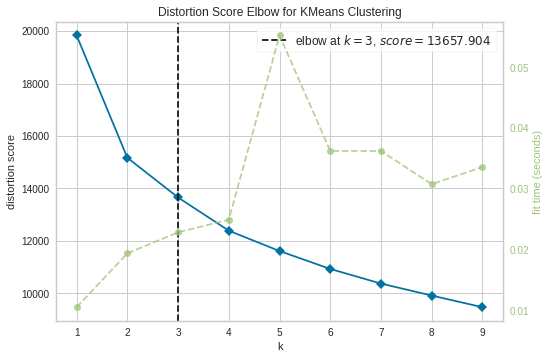

In [ ]:
#The Elbow Method
data = credits.drop(['Decision'],axis=1).copy()
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# Remplir le nombre de clusters à passer pour l'algorithme k-means
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [ ]:
# Afiicher les centroides finaux
pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)

,revenuAnnuel,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail
0,4.659711,5.473884,5.541161,2.831984,5.807692,6.865385,5.567308,4.659711,4.397436,7.634615,11.0,8.211538,6.264423
1,5.098998,5.946400,3.635858,3.041078,6.548780,5.451220,5.695122,5.098998,4.617886,7.829268,1.0,4.902439,6.320122
2,3.615496,4.289494,9.140351,11.000000,6.666667,7.000000,5.500000,3.615496,5.000000,1.000000,11.0,7.333333,5.333333


In [ ]:
labels= kmeans.labels_

In [ ]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
# Initialize random 3 centroids => we want 3 clusters
centroids = random_centroids(data, 3)
centroids

,0,1,2
revenuAnnuel,1.113675,5.649701,4.599835
salaire,2.138911,5.035251,1.018602
age,2.052632,1.877193,2.578947
anneeTravaillee,3.105263,5.736842,3.105263
nbDernierCreditRefuse,8.500000,6.000000,6.000000
nbDernierCreditQccepte,11.000000,11.000000,11.000000
PersonnesEnCharge,11.000000,8.500000,8.500000
RevenuNetMoyen,8.038945,5.335463,2.487053
nbVoitures,1.000000,7.666667,4.333333
catgSocialePro,6.000000,6.000000,11.000000


In [ ]:
# Distance entre chaque joueur et chaque cluster 
distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
distances

,0,1,2
0,21.591116,16.527662,20.776682
1,14.260654,11.311090,14.101101
2,16.076425,15.133705,16.392651
3,18.097883,15.031679,16.570621
4,14.662156,9.952804,13.282642
...,...,...,...
144,21.917349,15.679026,20.754612
145,17.691519,21.082395,17.936014
146,20.987013,17.868067,19.115765
147,19.256603,13.318076,17.326957


In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
# Obtenir les labels pour chaque point de données
labels = get_labels(data, centroids)
labels.value_counts()

1    78
2    58
0    13
dtype: int64

In [ ]:
# Créer de nouveaux centroïdes
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
# Tracer les centroïdes en 2D après avoir utilisé PCA
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

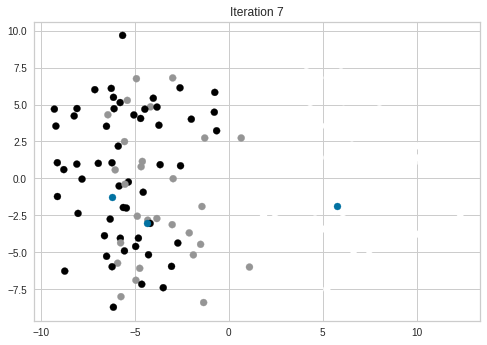

In [ ]:
# Tout mettre ensemble pour l'algorithme K-means
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1,2
revenuAnnuel,3.769744,3.665355,4.881948
salaire,4.299052,4.182896,5.655052
age,5.625394,3.424006,3.069743
anneeTravaillee,3.490440,2.767076,2.656333
nbDernierCreditRefuse,4.899045,2.309310,7.795524
nbDernierCreditQccepte,5.038896,6.704997,2.535880
PersonnesEnCharge,4.448219,2.940149,5.068738
RevenuNetMoyen,3.769744,3.665355,4.881948
nbVoitures,3.818887,4.239233,3.712396
catgSocialePro,4.685230,6.832193,7.855023


In [ ]:
labels.value_counts()

0    67
2    54
1    28
dtype: int64

```
# CAH (Classification Ascendante Hiérarchique)
```

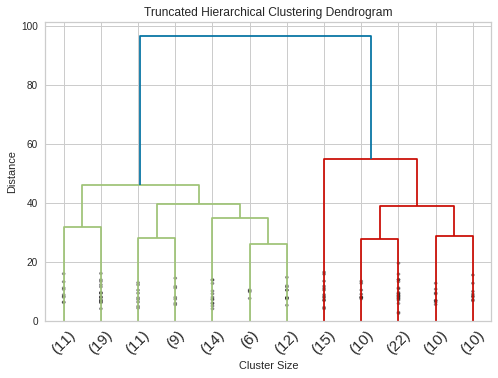

In [ ]:
#générer la matrice des liens
Z = linkage(data,method='ward',

      metric='euclidean')

#affichage du dendrogramme

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45.,leaf_font_size=15., show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=200)
plt.axhline(y=270)
plt.show()

In [ ]:
k=3
Hclustering=AgglomerativeClustering(n_clusters =k, affinity='euclidean', linkage='ward')
CAH= Hclustering.fit(data)

In [ ]:
def plot_clusters_CAH(data, labels):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    clear_output(wait=True)
    plt.title('CAH Results')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels, cmap='jet_r')
    plt.show()

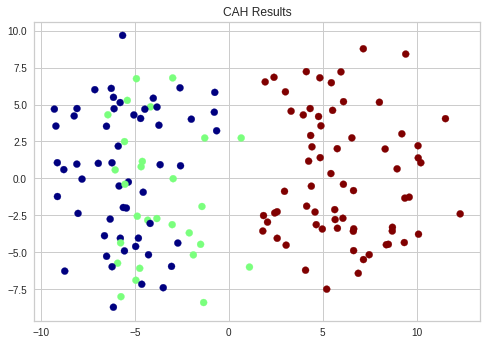

In [ ]:
plot_clusters_CAH(data,labels)

**6- Le déploiement**

---




Une fois qu'un modèle
satisfaisant a été développé et
approuvé par les sponsors
commerciaux, il est déployé
dans l'environnement de
production ou dans un
environnement de test
comparable.

L’objectif de cette étapes
est de mettre la connaissance obtenue par la
modélisation, dans une forme adaptée, et
l’intégrer au processus de prise de décision.